# Introduction to Regression with TensorFlow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

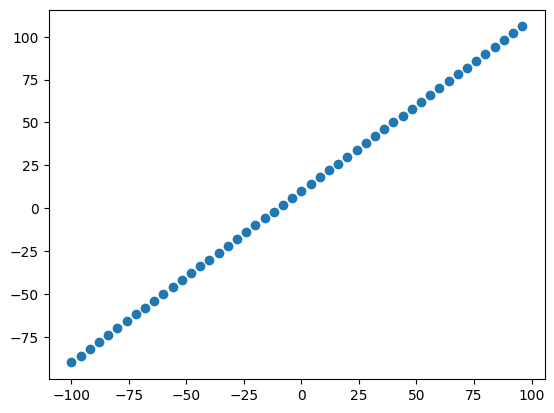

In [ ]:
X = tf.range(-100, 100, 4)
y = X + 10
plt.scatter(X, y)

In [ ]:
len(X)

50

In [ ]:
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.2, random_state=0)

In [ ]:
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

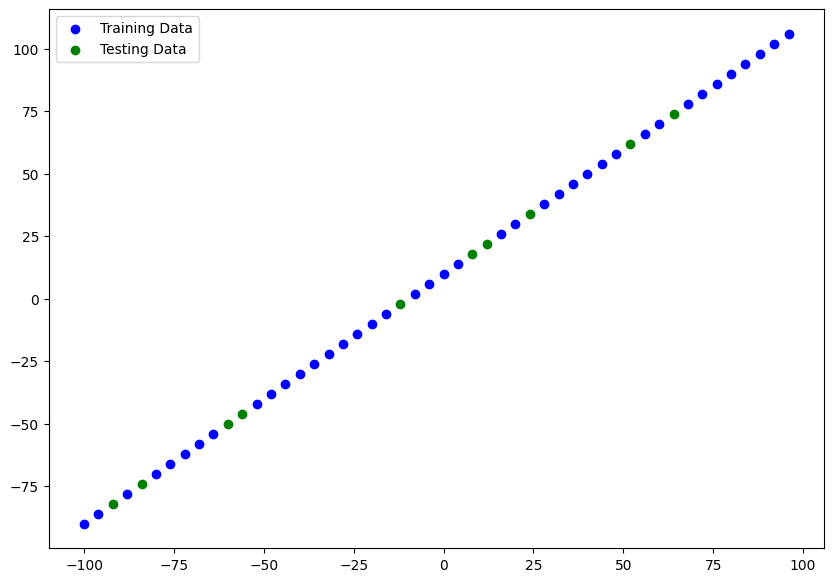

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()

In [ ]:
# Let's create simple tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(1,)), # useful to use function model.summary(), that's what I know right now.
    Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # sophisticated gradient descent
              metrics=["mae"])

## Visualizing the model

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params = total number of parameters in the model.
* Trainable params = number of parameters that can be updated.
* Non-trainable params = parameters aren't updated during training, (this is typical if you use transfer learning

In [ ]:
 # Seems like Dense is a fully connected layer

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=50, verbose=0) # try changing verbose between 0, 1, 2

## Visualize the model

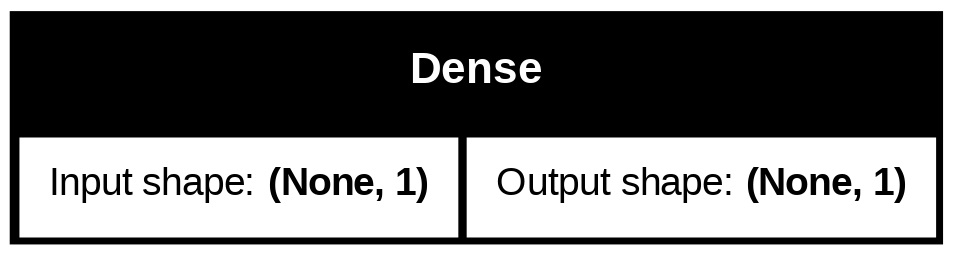

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

## Visualize the model's predictions

In [ ]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

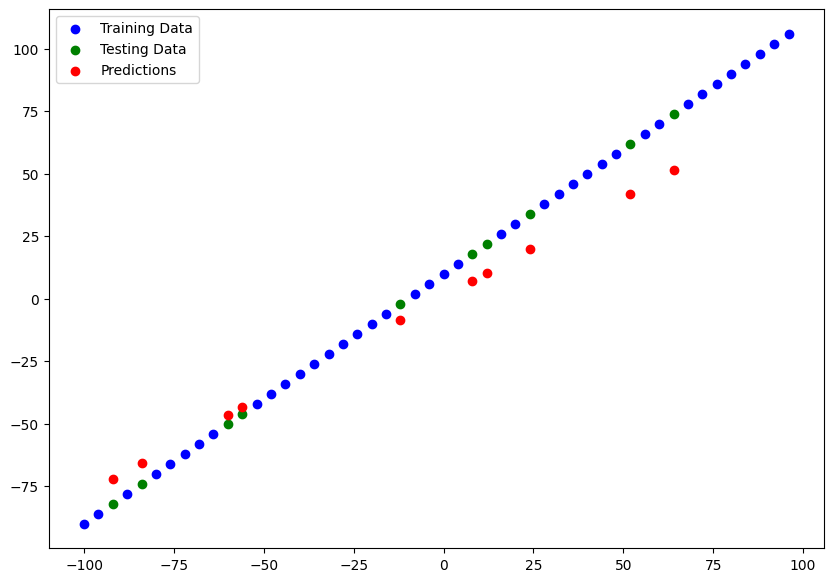

In [ ]:
plot_predictions()

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step - loss: 11.0190 - mae: 11.0190


[11.019018173217773, 11.019018173217773]

Obviously, this isn't a good model. One thing you'll do is experiment. That's it.


* Tensorboard - a component of the TensorFlow library to help track modelling experiments.
* Weights and Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into Tensorboard) (wandb.com)

## Saving the model
you can save by hdf5 format

In [ ]:
# Save the model using the hdf5 format
model.save("model_hdf5_format.h5")

## Loading in a saved model

In [ ]:
# Loaded h5 model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/model_hdf5_format.h5")

In [ ]:
loaded_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
loaded_model_y_preds = loaded_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [ ]:
loaded_model.evaluate(loaded_model_y_preds, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - loss: 18.1535 - mean_absolute_error: 18.1535


[18.153493881225586, 18.153493881225586]

I guess I have to save and load the model in another way, cause these instructions are outdated and don't work properly.

## Download a model from google collab
You can download the model manually and by code.

In [ ]:
# Download a file from collab
from google.colab import files
files.download("/content/drive/MyDrive/Colab Notebooks/Tensorflow_practice/model_hdf5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Working with a sample kaggle Dataset (Medical Cost Personal Datasets)

In [ ]:
# Import tools
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the data directly from the github raw code
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)

In [ ]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(1338, 11)

In [ ]:
X

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [ ]:
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

insurance_model = Sequential([
    Input(shape=(11,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['mae'])

In [ ]:
insurance_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

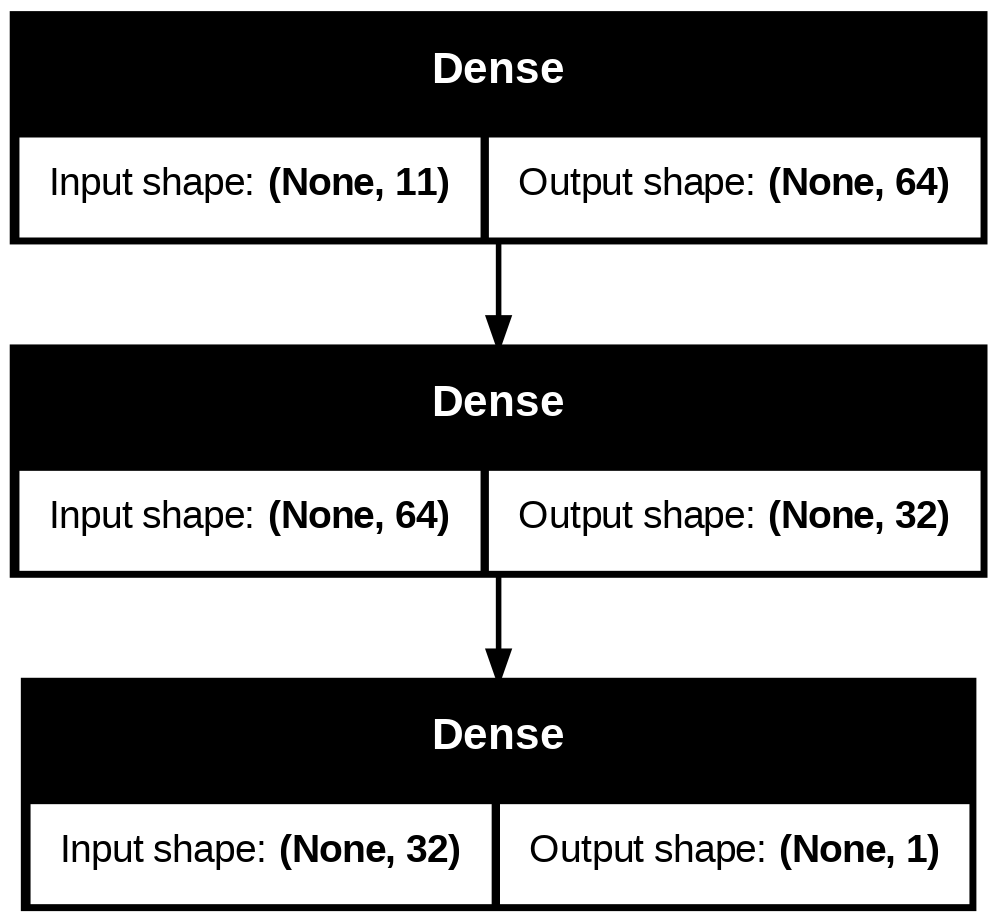

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(insurance_model, show_shapes=True)

In [ ]:
history = insurance_model.fit(X_train, y_train, epochs=200, steps_per_epoch=20, verbose=2)

Epoch 1/200
34/34 - 0s - 4ms/step - loss: 1592.1750 - mae: 1592.1750
Epoch 2/200
34/34 - 0s - 4ms/step - loss: 1588.1547 - mae: 1588.1547
Epoch 3/200
34/34 - 0s - 5ms/step - loss: 1588.8530 - mae: 1588.8530
Epoch 4/200
34/34 - 0s - 8ms/step - loss: 1587.9498 - mae: 1587.9498
Epoch 5/200
34/34 - 0s - 4ms/step - loss: 1589.0500 - mae: 1589.0500
Epoch 6/200
34/34 - 0s - 3ms/step - loss: 1592.1350 - mae: 1592.1350
Epoch 7/200
34/34 - 0s - 4ms/step - loss: 1589.0874 - mae: 1589.0874
Epoch 8/200
34/34 - 0s - 4ms/step - loss: 1592.9929 - mae: 1592.9929
Epoch 9/200
34/34 - 0s - 4ms/step - loss: 1580.8762 - mae: 1580.8762
Epoch 10/200
34/34 - 0s - 4ms/step - loss: 1580.8278 - mae: 1580.8278
Epoch 11/200
34/34 - 0s - 4ms/step - loss: 1576.3076 - mae: 1576.3076
Epoch 12/200
34/34 - 0s - 4ms/step - loss: 1586.2930 - mae: 1586.2930
Epoch 13/200
34/34 - 0s - 9ms/step - loss: 1584.1288 - mae: 1584.1288
Epoch 14/200
34/34 - 0s - 4ms/step - loss: 1581.9873 - mae: 1581.9873
Epoch 15/200
34/34 - 0s - 3ms

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1390.4989 - mae: 1390.4989 


[1496.1845703125, 1496.1845703125]

Text(0.5, 0, 'epochs')

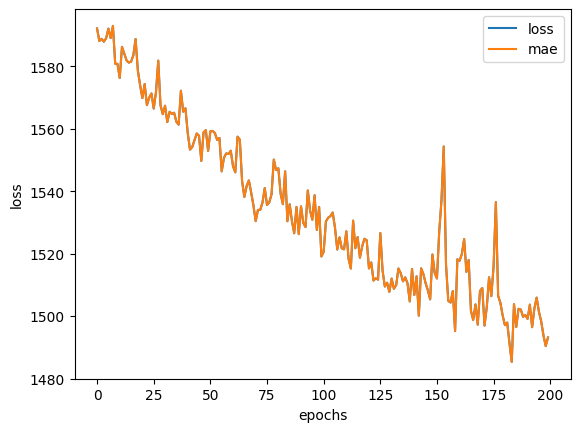

In [ ]:
# Let's plot the history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1250.6230 - mae: 1250.6230


[1365.7880859375, 1365.7880859375]

There is a function EarlyStoppingCallback which stops training, once it stops improving a certain metric

### For normalization:
* Standardization = StandardScaler
* Scale (also referred to as normalization) = MinMaxScaler => Use as default scaler when you're using neural networks. MinMaxScaler converts all numerical values in range of 0 and 1, and conserves the original distribution. While standardization converts the data into normal distribution, this possibly removes outliers.

In [ ]:
insurance2 = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children']),
                             (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']))

X = insurance2.drop('charges', axis=1)
y = insurance2['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
insurance_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

In [ ]:
insurance_model.fit(X_train_normal, y_train, epochs=200, verbose=2)

Epoch 1/200
34/34 - 0s - 3ms/step - loss: 1700.2449 - mae: 1700.2449
Epoch 2/200
34/34 - 0s - 4ms/step - loss: 1717.9241 - mae: 1717.9241
Epoch 3/200
34/34 - 0s - 5ms/step - loss: 1715.1510 - mae: 1715.1510
Epoch 4/200
34/34 - 0s - 3ms/step - loss: 1699.4795 - mae: 1699.4795
Epoch 5/200
34/34 - 0s - 6ms/step - loss: 1710.0597 - mae: 1710.0597
Epoch 6/200
34/34 - 0s - 3ms/step - loss: 1703.6244 - mae: 1703.6244
Epoch 7/200
34/34 - 0s - 3ms/step - loss: 1697.0603 - mae: 1697.0603
Epoch 8/200
34/34 - 0s - 4ms/step - loss: 1693.6921 - mae: 1693.6921
Epoch 9/200
34/34 - 0s - 3ms/step - loss: 1688.6448 - mae: 1688.6448
Epoch 10/200
34/34 - 0s - 3ms/step - loss: 1688.0830 - mae: 1688.0830
Epoch 11/200
34/34 - 0s - 4ms/step - loss: 1692.1499 - mae: 1692.1499
Epoch 12/200
34/34 - 0s - 4ms/step - loss: 1693.3353 - mae: 1693.3353
Epoch 13/200
34/34 - 0s - 4ms/step - loss: 1683.9100 - mae: 1683.9100
Epoch 14/200
34/34 - 0s - 3ms/step - loss: 1684.7241 - mae: 1684.7241
Epoch 15/200
34/34 - 0s - 3ms

In [ ]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1264.8051 - mae: 1264.8051


[1394.4735107421875, 1394.4735107421875]

## This is the end of this notebook